# Tarea 5 - Método de Newton y Método de la Secante  
**Nombre:** Alexis Bautista  
**Fecha de entrega:** 27 de noviembre de 2024  
**Paralelo:** GR1CC  
**Enlace de GitHub:** https://github.com/alexis-bautista/Tarea05-MN.git

1. Sea $f(x) = −𝑥^3 − cos𝑥$ y $𝑝_0 = −1$. Use el método de Newton y de la Secante para encontrar $𝑝_2$. ¿Se podría 
usar $𝑝_0 = 0$?  
Ejercicio adjunto en el pdf del repositorio

2. Encuentre soluciones precisas dentro de 10−4 para los siguientes problemas.  
a. $x^3-2x^2-5=0, [1,4]$  
b. $x^3-3x^2-1=0, [-3,-1]$  
c. $x-\cos{x}=0, [0, \pi/2]$  
d. $x-0.8-0.2\sin{x}=0, [0, \pi/2]$  
Ejercicios adjuntos en el pdf del repositorio.

3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{−5}$ para los siguientes problemas.  

a. $3x-e^x=0$ para $1\leq{x}\leq{2}$

Sabemos que:

Formula de Newton: $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$  
Formula de la Secante: $x_{n+1}=x_n​−f(x_n​)⋅\frac{x_n-x_{n-1}}{f(x_n​)−f(x_{n−1}​)}$

Funcion: $f(x)=3x-e^x$  
Derivada: $f'=3-e^x$

**Para el método de Newton**

In [1]:
import math

def f(x):
    return 3*x - math.exp(x)

def f_prima(x):
    return 3 - math.exp(x)

In [2]:
def metodo_newton(f, f_prime, x0, tol=1e-5, max_iter=100):
    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn, n
        dfxn = f_prime(xn)
        if dfxn == 0:
            raise ValueError('Derivada es cero. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de Newton')
        xn = xn - fxn / dfxn
    return None

#tomamos como valor incial el punto medio del intervalo
x0 = 1.5
solucion, iteraciones = metodo_newton(f, f_prima, x0)
print(f'La solución precisa dentro de {1e-5} es: {solucion} en {iteraciones} iteraciones')
print(f'f({solucion}) = {f(solucion)}')

La solución precisa dentro de 1e-05 es: 1.512134625427124 en 2 iteraciones
f(1.512134625427124) = -1.1333940630464667e-07


**Para el metodo de la secante**

In [3]:
def metodo_secante(f, x0, x1, tol=1e-5, max_iter=100):
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, n
        if fx1 == fx0:
            raise ValueError('f(x0) y f(x1) son iguales. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de la secante')
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    return None

# Valores iniciales, usamos los extremos del intervalo
x0_secante = 1
x1_secante = 2

solucion, iteraciones = metodo_secante(f, x0_secante, x1_secante)
print(f'La solución precisa dentro de {1e-5} es: {solucion} en {iteraciones} iteraciones')
print(f'f({solucion}) = {f(solucion)}')

La solución precisa dentro de 1e-05 es: 1.5121339760022816 en 8 iteraciones
f(1.5121339760022816) = 8.844385552819745e-07


b. $2x+3\cos{x}-e^x=0$ para $1\leq{x}\leq{2}$

Sabemos que:

Formula de Newton: $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$  
Formula de la Secante: $x_{n+1}=x_n​−f(x_n​)⋅\frac{x_n-x_{n-1}}{f(x_n​)−f(x_{n−1}​)}$

Funcion: $f(x)=2x+3\cos{x}-e^x$  
Derivada: $f'=2-3senx-e^x$

**Para el metodo de Newton**

In [4]:
def f(x):
    return 2*x + 3 - math.cos(x) - math.exp(x)

def f_prima(x):
    return 2 - 3*math.sin(x) - math.exp(x)

#tomamos como valor incial el punto medio del intervalo
x0 = 1.5
solucion, iteraciones = metodo_newton(f, f_prima, x0)
print(f'La solución precisa dentro de {1e-5} es: {solucion} en {iteraciones} iteraciones')
print(f'f({solucion}) = {f(solucion)}')

La solución precisa dentro de 1e-05 es: 2.006014409413486 en 16 iteraciones
f(2.006014409413486) = 6.164336486591537e-06


**Para el metodo de la secante**

In [5]:
# Valores iniciales, usamos los extremos del intervalo
x0_secante = 1
x1_secante = 2

solucion, iteraciones = metodo_secante(f, x0_secante, x1_secante)
print(f'La solución precisa dentro de {1e-5} es: {solucion} en {iteraciones} iteraciones')
print(f'f({solucion}) = {f(solucion)}')

La solución precisa dentro de 1e-05 es: 2.0060153403917713 en 3 iteraciones
f(2.0060153403917713) = 1.949931518474557e-06


4. El polinomio de cuarto grado

$f(x)=230x^4+18x^3+9x^2-2221x-9$

tiene dos ceros reales, uno en $[−1,0]$ y el otro en $[0,1]$. Intente aproximar estos ceros dentro de $10^{−6}$ con:

In [6]:
def f(x):
    return 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

def f_prima(x):
    return 920*x**3 + 54*x**2 + 18*x - 221

a. El método de la secante (use los extremos como las estimaciones iniciales)

In [7]:
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, n
        if fx1 == fx0:
            raise ValueError('f(x0) y f(x1) son iguales. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de la secante')
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    return None

# Valores iniciales, usamos los extremos de los intervalo
# Cero en [-1, 0]
x0_secante_1 = -1
x1_secante_1 = 0
sol_1, iters_1 = metodo_secante(f, x0_secante_1, x1_secante_1)
print(f'Cero en [-1, 0] con secante: {sol_1} en {iters_1} iteraciones')
print(f'f({sol_1}) = {f(sol_1)}')

# Cero en [0, 1]
x0_secante_2 = 0
x1_secante_2 = 1
sol_2, iters_2 = metodo_secante(f, x0_secante_2, x1_secante_2)
print(f'Cero en [0, 1] con secante: {sol_2} en {iters_2} iteraciones')
print(f'f({sol_2}) = {f(sol_2)}')

Cero en [-1, 0] con secante: -0.040659288315725135 en 4 iteraciones
f(-0.040659288315725135) = -7.478462293875054e-12
Cero en [0, 1] con secante: -0.04065928831557162 en 11 iteraciones
f(-0.04065928831557162) = -4.1513459336783853e-11


b. El método de Newton (use el punto medio como estimación inicial)

In [8]:
def metodo_newton(f, f_prime, x0, tol=1e-6, max_iter=100):
    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn, n
        dfxn = f_prime(xn)
        if dfxn == 0:
            raise ValueError('Derivada es cero. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de Newton')
        xn = xn - fxn / dfxn
    return None

#tomamos como valor incial el punto medio del intervalo
#cero en [-1, 0]
x0 = -0.5
solucion, iteraciones = metodo_newton(f, f_prima, x0)
print(f'Cero en [-1, 0] con Newton: {solucion} en {iteraciones} iteraciones')
print(f'f({solucion}) = {f(solucion)}')

# Cero en [0, 1]
x0_2 = 0.5
solucion_2, iteraciones_2 = metodo_newton(f, f_prima, x0_2)
print(f'Cero en [0, 1] con Newton: {solucion_2} en {iteraciones_2} iteraciones')
print(f'f({solucion_2}) = {f(solucion_2)}')

Cero en [-1, 0] con Newton: -0.04065928831575899 en 4 iteraciones
f(-0.04065928831575899) = 2.842170943040401e-14
Cero en [0, 1] con Newton: -0.04065928834533494 en 5 iteraciones
f(-0.04065928834533494) = 6.557147713692757e-09


5. La función $𝑓(𝑥) = tan \pi 𝑥 − 6$ tiene cero en $(1/\pi)\arctan(6) ≈ 0.447431543.$ Sea $𝑝_0 = 0$ y $𝑝_1 = 0.48$ y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más 
eficaz y por qué?

In [9]:
import math

def f(x):
    return math.tan(math.pi * x) - 6

def f_prima(x):
    return math.pi / (math.cos(math.pi * x)**2)

a. Método de bisección

In [10]:
def metodo_biseccion(f, a, b, tol=1e-6, max_iter=10):
    if f(a) * f(b) > 0:
        raise ValueError('f(a) y f(b) deben tener signos opuestos para aplicar el método de bisección.')
    for i in range(max_iter):
        p = (a + b) / 2
        if abs(f(p)) < tol or (b - a) / 2 < tol:
            return p, i + 1
        if f(a) * f(p) < 0:
            b = p
        else:
            a = p
    return p, max_iter

# Valores iniciales
a, b = 0, 0.48 

sol_biseccion, iter_biseccion = metodo_biseccion(f, a, b, max_iter=10)
print(f'Solucion = {sol_biseccion:.6f}, iteraciones = {iter_biseccion}')
print(f'f({sol_biseccion}) = {f(sol_biseccion)}')

Solucion = 0.447656, iteraciones = 10
f(0.44765625) = 0.0262307752703812


b. Método de Newton

In [11]:
def metodo_newton(f, f_prime, x0, tol=1e-6, max_iter=10):
    xn = x0
    for n in range(max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            return xn, n
        dfxn = f_prime(xn)
        if dfxn == 0:
            raise ValueError('Derivada es cero. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de Newton')
        xn = xn - fxn / dfxn
    raise ValueError(f"No se alcanzó la convergencia después de {max_iter} iteraciones.")

#Valor inicial
x0 = 0
try:
    solucion, iteraciones = metodo_newton(f, f_prima, x0, max_iter=10)
    print(f"Solución = {solucion:.6f}, iteraciones = {iteraciones}")
    print(f"f({solucion}) = {f(solucion)}")
except ValueError as e:
    print(f"Error: {e}")

print('solucion mas aproximada a la raiz')
x0 = 0.447431543
try:
    solucion, iteraciones = metodo_newton(f, f_prima, x0, max_iter=10)
    print(f"Solución = {solucion:.6f}, iteraciones = {iteraciones}")
    print(f"f({solucion}) = {f(solucion)}")
except ValueError as e:
    print(f"Error: {e}")

Error: No se alcanzó la convergencia después de 10 iteraciones.
solucion mas aproximada a la raiz
Solución = 0.447432, iteraciones = 0
f(0.447431543) = -3.35635981230098e-08


c. Método de la secante

In [12]:
def metodo_secante(f, x0, x1, tol=1e-6, max_iter=100):
    for n in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1, n
        if fx1 == fx0:
            raise ValueError('f(x0) y f(x1) son iguales. No se puede dividir por cero por lo tanto no se puede aplicar el metodo de la secante')
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x2
    raise ValueError(f"No se alcanzó la convergencia después de {max_iter} iteraciones.")

# Valores iniciales
x0_secante = 0
x1_secante = 0.48
try: 
    solucion, iteraciones = metodo_secante(f, x0_secante, x1_secante, max_iter=10)
    print(f'La solución precisa dentro de {1e-5} es: {solucion} en {iteraciones} iteraciones')
    print(f"Secante: solución = {solucion:.6f}, iteraciones = {iteraciones}")
except ValueError as e:
    print(f"Error: {e}")

Error: No se alcanzó la convergencia después de 10 iteraciones.


El método de Newton suele ser el más eficaz en términos de número de iteraciones, dado que tiene convergencia cuadrática. Sin embargo, si la derivada no está bien definida o el punto inicial está lejos de la raíz, como se pudo observar en el resulatado, que si colocamos el valor inicial 0 no se llega al resultado en 10 iteraciones, pero si colacamos el resultado mas aproximado no tuvo la necesidad de realizar ninguna iteracion. El método de secante es más confiable y aún eficiente, pero pudimos observar que en estoe caso no se llega a la solucion con 10 iteracionnes o menos. La bisección, aunque lenta, es robusta y garantiza convergencia si los signos son opuestos en el intervalo inicial.

6. La función descrita por $f(x) = \ln(x^2+1)-e^{0.4x}\cos\pi x$ tiene un número infinito de ceros.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.log(x**2 + 1) - np.exp(0.4 * x) * np.cos(np.pi * x)

def f_prima(x):
    term1 = (2 * x) / (x**2 + 1)  # Derivada de ln(x^2 + 1)
    term2 = np.exp(0.4 * x) * (-np.pi * np.sin(np.pi * x) + 0.4 * np.cos(np.pi * x))  # Derivada de e^(0.4x) * cos(pi*x)
    return term1 - term2

a. Determine, dentro de $10^{−6}$, el único cero negativo.

In [14]:
x0_negativo = -1  # Aproximación inicial para el cero negativo
cero_negativo, iteraciones = metodo_newton(f, f_prima, x0_negativo, tol=1e-6, max_iter=100)
print(f"Cero negativo: {cero_negativo:.6f}, Iteraciones: {iteraciones}")

Cero negativo: 0.450657, Iteraciones: 5


b. Determine, dentro de $10^{−6}$, los cuatro ceros positivos mas pequeños.

In [15]:
# Aproximaciones iniciales basadas en la gráfica
x0_positivos = [0.5, 1.8, 2.2, 3.6]
ceros_positivos = []

for x0 in x0_positivos:
    cero, iteraciones = metodo_newton(f, f_prima, x0, tol=1e-6, max_iter=100)
    ceros_positivos.append((cero, iteraciones))

print("\nCeros positivos más pequeños:")
for i, (cero, iteraciones) in enumerate(ceros_positivos, start=1):
    print(f"Cero {i}: {cero:.6f}, Iteraciones: {iteraciones}")


Ceros positivos más pequeños:
Cero 1: 0.450657, Iteraciones: 3
Cero 2: 1.744738, Iteraciones: 3
Cero 3: 2.238320, Iteraciones: 3
Cero 4: 3.709041, Iteraciones: 3


c. Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de 𝑓. 
[Sugerencia: Dibuje una gráfica aproximada de 𝑓.]


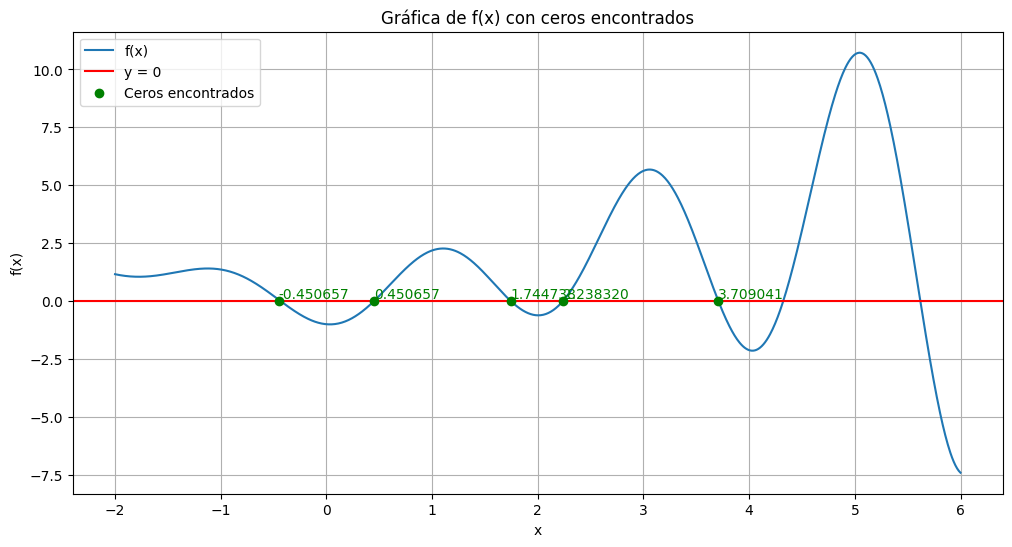

In [16]:
# Ceros ya encontrados
cero_negativo = -0.450657  # Cero negativo aproximado
ceros_positivos = [0.450657, 1.744738, 2.238320, 3.709041]  # Cuatro ceros positivos mas pequenos aproximados

x_vals = np.linspace(-2, 6, 1000)
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(12, 6))
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color="red", linestyle="-", label="y = 0")

# Marcar los ceros en la gráfica
plt.scatter([cero_negativo] + ceros_positivos, [0] * (1 + len(ceros_positivos)), 
            color="green", label="Ceros encontrados", zorder=5)

# Etiquetas para los ceros
plt.text(cero_negativo, 0.1, f"{cero_negativo:.6f}", color="green", fontsize=10)
for cero in ceros_positivos:
    plt.text(cero, 0.1, f"{cero:.6f}", color="green", fontsize=10)

# Configuración de la gráfica
plt.title("Gráfica de f(x) con ceros encontrados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


Basado en la gráfica y el comportamiento de $f(x)$, una aproximación inicial para el enésimo cero positivo es:

$x_o =n +0.5$ para $n \in \mathbb{N}$


Cero negativo: 17.501661, Iteraciones: 3


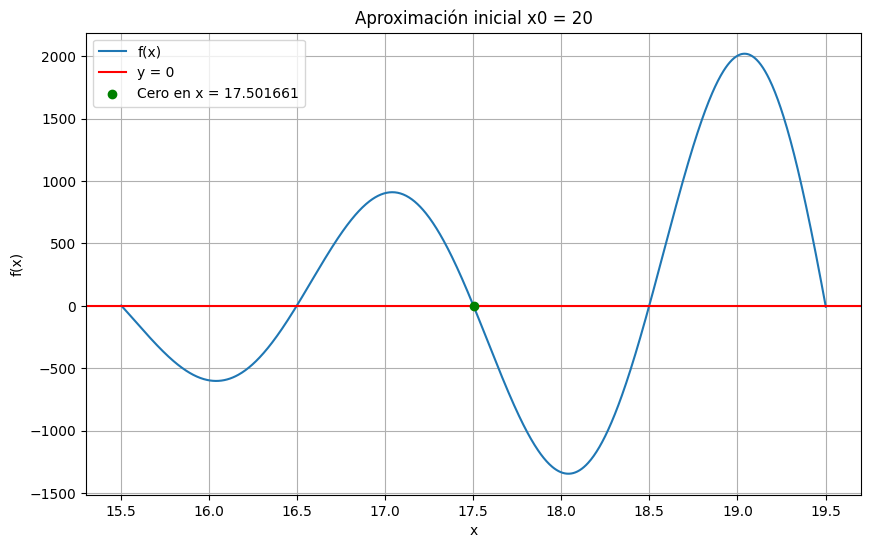

In [17]:
x0 = 20  # Aproximación inicial para el enesimo cero
cero_enesimo, iteraciones = metodo_newton(f, f_prima, x0, tol=1e-6, max_iter=100)
print(f"Cero negativo: {cero_enesimo:.6f}, Iteraciones: {iteraciones}")

#Grafica
if cero_enesimo is not None:
    x_min = cero_enesimo - 2  # Extremos ajustados alrededor del cero
    x_max = cero_enesimo + 2
else:
    x_min = x0 - 5  # Caso de error, rango ampliado
    x_max = x0 + 5

x_vals = np.linspace(x_min, x_max, 1000)  # Rango para graficar
y_vals = [f(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color="red", linestyle="-", label="y = 0")

# Añadir el cero encontrado, si existe
if cero_enesimo is not None:
    plt.scatter([cero_enesimo], [0], color="green", zorder=5, 
                label=f"Cero en x = {cero_enesimo:.6f}")

plt.title(f"Aproximación inicial x0 = {x0}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

7. La función $f(x)=x^{\frac{1}{3}}$ tiene raíz en $x=0$. Usando el punto de inicio de $𝑥 = 1$ y $𝑝_0 = 5$, $𝑝1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

In [18]:
def f(x):
    return x**(1/3)

def f_prima(x):
    return (1/3) * x**(-2/3)

In [19]:
# puntos iniciales 
x0_newton = 1
p0_secante = 5
p1_secante = 0.5

try:
    # Método de Newton
    solucion_newton, iteraciones_newton = metodo_newton(f, f_prima, x0_newton, tol=1e-6, max_iter=1000)
    print(f"Método de Newton: solución = {solucion_newton:.6f}, iteraciones = {iteraciones_newton}")
    
    # Método de la Secante
    solucion_secante, iteraciones_secante = metodo_secante(f, p0_secante, p1_secante, tol=1e-6, max_iter=1000)
    print(f"Método de la Secante: solución = {solucion_secante:.6f}, iteraciones = {iteraciones_secante}")
    
except ValueError as e:
    print(f"Error: {e}")

Error: No se alcanzó la convergencia después de 1000 iteraciones.


En este caso ningun metodo fue preciso, ya que ninguno logra realizar una convergencia incluso en un numero grande de convergencias. El método de Newton puede tener problemas de estabilidad debido a la singularidad en la derivada cerca de $x=0$.